In [178]:
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [179]:
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
#specifying column names
column_names=['label','sentence']

In [3]:
#reading train data
train_df=pd.read_csv("propaganda_train.tsv",delimiter="\t",quotechar='|')
train_df.columns=column_names
train_df.head()

,label,sentence
0,not_propaganda,"No, <BOS> he <EOS> will not be confirmed."
1,not_propaganda,This declassification effort <BOS> won’t make ...
2,flag_waving,"""The Obama administration misled the <BOS> Ame..."
3,not_propaganda,“It looks like we’re capturing the demise of t...
4,not_propaganda,"<BOS> Location: Westerville, Ohio <EOS>"


In [4]:
#reading validation data
val_df=pd.read_csv("propaganda_val.tsv",delimiter="\t",quotechar='|')
val_df.columns=column_names
val_df.head()

,label,sentence
0,not_propaganda,"On average, between 300 and 600 infections are..."
1,causal_oversimplification,Mostly because <BOS> the country would not las...
2,appeal_to_fear_prejudice,Lyndon Johnson <BOS> gets Earl Warren and Sen....
3,not_propaganda,<BOS> You <EOS> may opt out at anytime.
4,repetition,It must be exacted from him directly in order ...


In [5]:
#number of labels in train data
train_df.label.value_counts()

label
not_propaganda               1269
exaggeration,minimisation     170
name_calling,labeling         166
causal_oversimplification     165
loaded_language               161
repetition                    160
doubt                         157
appeal_to_fear_prejudice      157
flag_waving                   155
Name: count, dtype: int64

In [6]:
#number of labels in validation data
val_df.label.value_counts()

label
not_propaganda               331
flag_waving                   45
appeal_to_fear_prejudice      43
doubt                         43
repetition                    40
loaded_language               39
causal_oversimplification     35
name_calling,labeling         34
exaggeration,minimisation     30
Name: count, dtype: int64

In [7]:
#train data info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     2560 non-null   object
 1   sentence  2560 non-null   object
dtypes: object(2)
memory usage: 40.1+ KB


## The Number of Data in Each Dataset

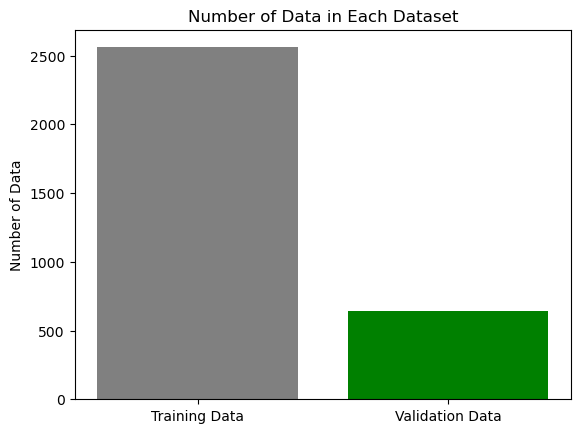

In [277]:
categories = ['Training Data', 'Validation Data']
numbers = [len(train_df), len(val_df)]

plt.bar(categories, numbers, color=['gray', 'green'])
plt.ylabel('Number of Data')
plt.title('Number of Data in Each Dataset')
plt.show()

In [278]:
print("Number of Data:")
print("--------------------------")
print("Training Data: {:.2f}".format(len(train_df)))
print("Validation Data: {:.2f}".format(len(val_df)))

Number of Data:
--------------------------
Training Data: 2560.00
Validation Data: 640.00


## Label Distribution

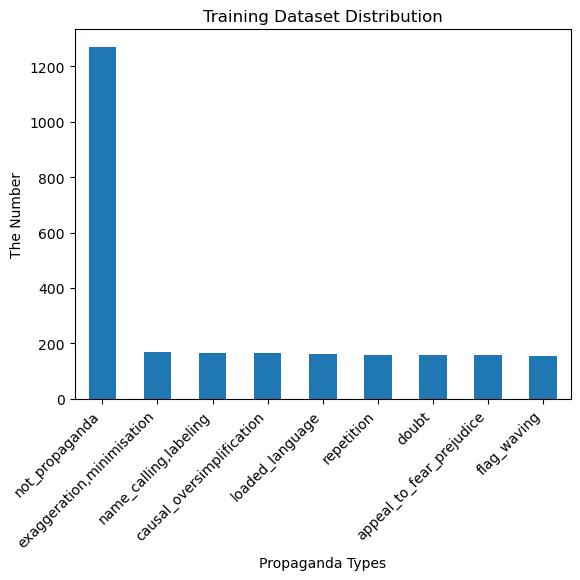

In [279]:
#Train data label distribution
train_df.label.value_counts().plot(kind='bar')
plt.title('Training Dataset Distribution')
plt.xlabel('Propaganda Types')
plt.ylabel('The Number')
plt.xticks(rotation=45, ha="right")
plt.show()

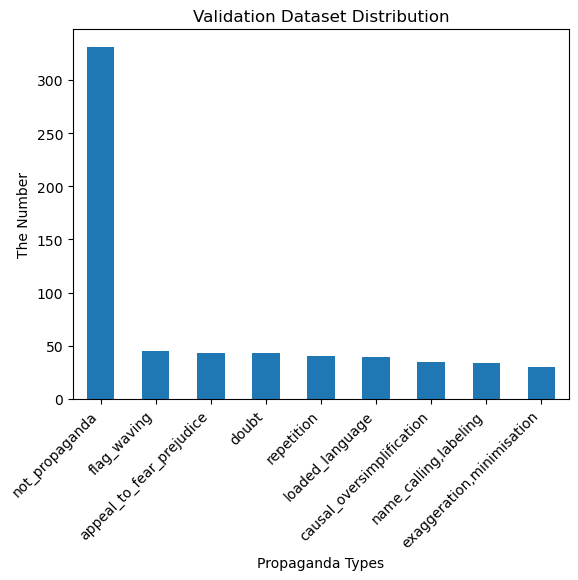

In [280]:
#validation data label distribution
val_df.label.value_counts().plot(kind='bar')
plt.title('Validation Dataset Distribution')
plt.xlabel('Propaganda Types')
plt.ylabel('The Number')
plt.xticks(rotation=45, ha="right")
plt.show()

## Average Number of Tokens

In [281]:
def average_token(sentences):
    total_tokens=0
    for sentence in sentences:
        tokens=sentence.split()

        for token in tokens:        
            if token!= "<BOS>" and token!="<EOS>":
                total_tokens+=1
    total_sentence=len(train_df.sentence)
    average=total_tokens/total_sentence
    return average

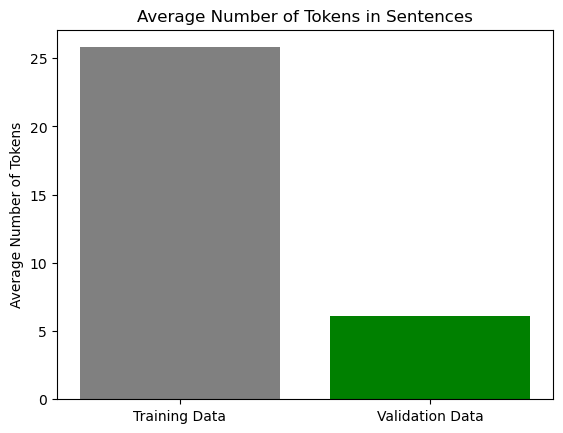

In [282]:
train_avg = average_token(train_df.sentence)
val_avg = average_token(val_df.sentence)

categories = ['Training Data', 'Validation Data']
averages = [train_avg, val_avg]

plt.bar(categories, averages, color=['gray', 'green'])
plt.ylabel('Average Number of Tokens')
plt.title('Average Number of Tokens in Sentences')
plt.show()

In [283]:
print("Average Token Numbers:")
print("----------------------")
print("Training Data: {:.2f}".format(average_token(train_df.sentence)))
print("Validation Data: {:.2f}".format(average_token(val_df.sentence)))

Average Token Numbers:
----------------------
Training Data: 25.80
Validation Data: 6.11


## Average Number of Tokens for Each Label

### Training

In [284]:
avg_num_tokens={}
for label in train_df.label.unique():
    dff=train_df[train_df.label==label]
    avg_num_tokens[label]=average_token(dff.sentence)

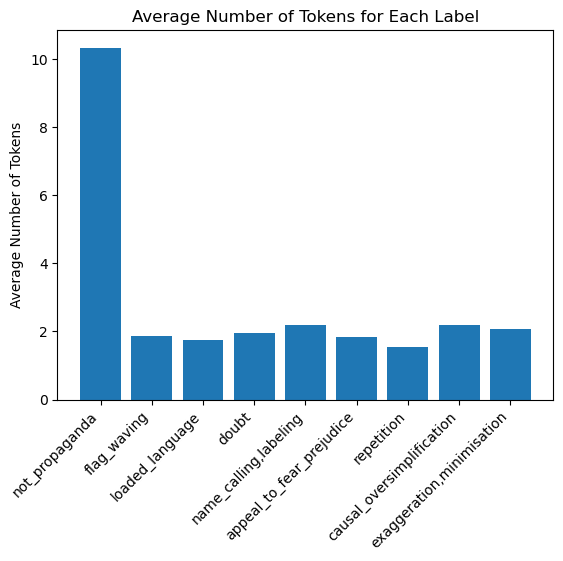

In [285]:
categories=list(avg_num_tokens.keys())
values=list(avg_num_tokens.values())

plt.bar(categories, values)
plt.ylabel('Average Number of Tokens')
plt.title('Average Number of Tokens for Each Label')
plt.xticks(rotation=45, ha="right")
plt.show()

In [286]:
print("Average Number of Tokens for Each Label:")
print("----------------------------------------")
for i in avg_num_tokens:
    print(i,":",avg_num_tokens[i])

Average Number of Tokens for Each Label:
----------------------------------------
not_propaganda : 10.34765625
flag_waving : 1.878125
loaded_language : 1.762890625
doubt : 1.957421875
name_calling,labeling : 2.182421875
appeal_to_fear_prejudice : 1.845703125
repetition : 1.553515625
causal_oversimplification : 2.18046875
exaggeration,minimisation : 2.087109375


### Validation

In [287]:
avg_num_characters={}
for label in val_df.label.unique():
    dff=val_df[val_df.label==label]
    snippet_train=list(dff['sentence'].apply(lambda x: snippet(x,"<BOS>","<EOS>")))
    avg_num_characters[label]=average_character(snippet_train)

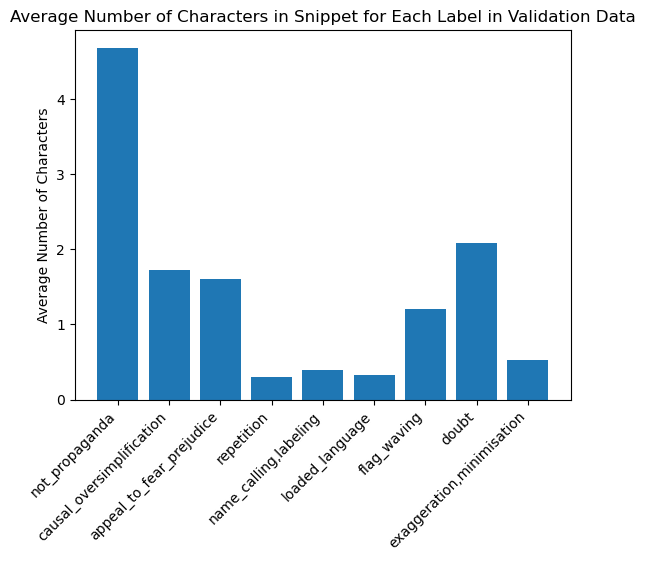

In [288]:
categories=list(avg_num_characters.keys())
values=list(avg_num_characters.values())

plt.bar(categories, values)
plt.ylabel('Average Number of Characters')
plt.title('Average Number of Characters in Snippet for Each Label in Validation Data')
plt.xticks(rotation=45, ha="right")
plt.show()

In [289]:
print("Average Number of Characters in Snippet for Each Label in Validation Data:")
print("----------------------------------------")
for i in avg_num_characters:
    print(i,":",avg_num_characters[i])

Average Number of Characters in Snippet for Each Label in Validation Data:
----------------------------------------
not_propaganda : 4.68671875
causal_oversimplification : 1.725
appeal_to_fear_prejudice : 1.609765625
repetition : 0.294140625
name_calling,labeling : 0.3953125
loaded_language : 0.32109375
flag_waving : 1.204296875
doubt : 2.08828125
exaggeration,minimisation : 0.52890625


## Average Number of Characters

In [290]:
def average_character(sentences):
    total_length,total_sentence=0,0
    for sentence in sentences:
        total_length+=len(sentence)

    total_sentence=len(train_df.sentence)
    average=total_length/total_sentence
    return average

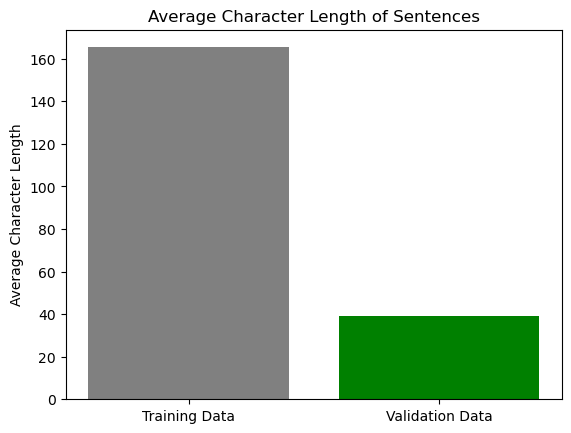

In [291]:
train_avg = average_character(train_df.sentence)
val_avg = average_character(val_df.sentence)

categories = ['Training Data', 'Validation Data']
averages = [train_avg, val_avg]

plt.bar(categories, averages, color=['gray', 'green'])
plt.ylabel('Average Character Length')
plt.title('Average Character Length of Sentences')
plt.show()

In [292]:
print("Average Character Numbers:")
print("--------------------------")
print("Training Data: {:.2f}".format(average_character(train_df.sentence)))
print("Validation Data: {:.2f}".format(average_character(val_df.sentence)))

Average Character Numbers:
--------------------------
Training Data: 165.33
Validation Data: 39.29


## Average Number of Characters for Each Label

### Training

In [293]:
avg_num_characters={}
for label in train_df.label.unique():
    dff=train_df[train_df.label==label]
    avg_num_characters[label]=average_character(dff.sentence)

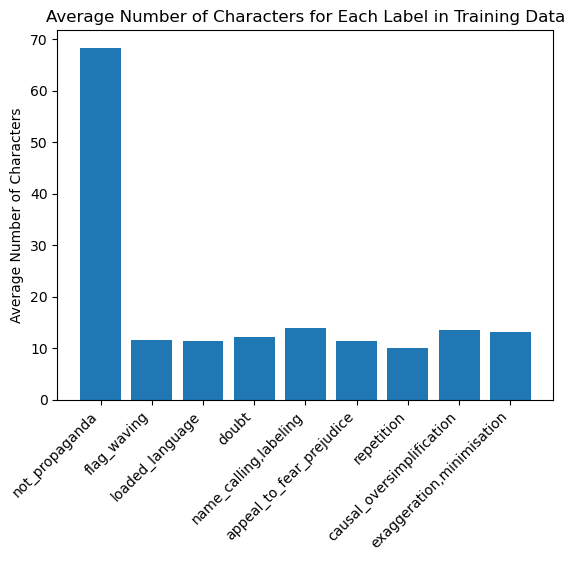

In [294]:
categories=list(avg_num_characters.keys())
values=list(avg_num_characters.values())

plt.bar(categories, values)
plt.ylabel('Average Number of Characters')
plt.title('Average Number of Characters for Each Label in Training Data')
plt.xticks(rotation=45, ha="right")
plt.show()

In [295]:
print("Average Number of Tokens for Each Label in Training Data:")
print("----------------------------------------")
for i in avg_num_characters:
    print(i,":",avg_num_characters[i])

Average Number of Tokens for Each Label in Training Data:
----------------------------------------
not_propaganda : 68.36171875
flag_waving : 11.6390625
loaded_language : 11.301171875
doubt : 12.204296875
name_calling,labeling : 13.90390625
appeal_to_fear_prejudice : 11.34453125
repetition : 10.021875
causal_oversimplification : 13.44453125
exaggeration,minimisation : 13.107421875


### Validation

In [296]:
avg_num_characters={}
for label in val_df.label.unique():
    dff=val_df[val_df.label==label]
    avg_num_characters[label]=average_character(dff.sentence)

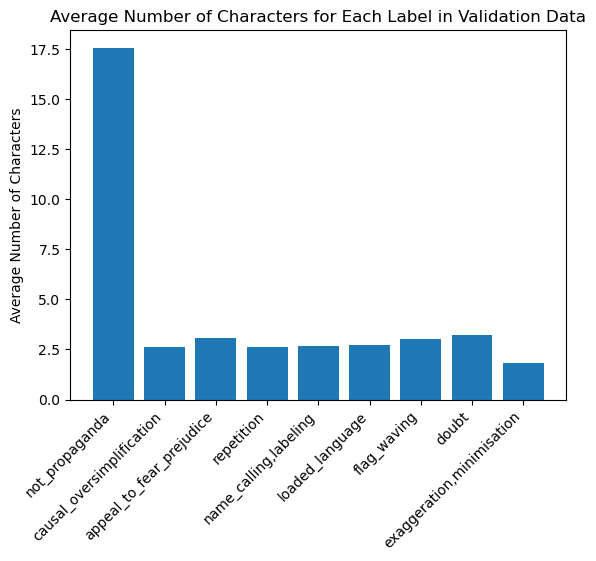

In [297]:
categories=list(avg_num_characters.keys())
values=list(avg_num_characters.values())

plt.bar(categories, values)
plt.ylabel('Average Number of Characters')
plt.title('Average Number of Characters for Each Label in Validation Data')
plt.xticks(rotation=45, ha="right")
plt.show()

In [298]:
print("Average Number of Tokens for Each Label in Training Data:")
print("----------------------------------------")
for i in avg_num_characters:
    print(i,":",avg_num_characters[i])

Average Number of Tokens for Each Label in Training Data:
----------------------------------------
not_propaganda : 17.571875
causal_oversimplification : 2.632421875
appeal_to_fear_prejudice : 3.055078125
repetition : 2.609375
name_calling,labeling : 2.6484375
loaded_language : 2.74453125
flag_waving : 3.00390625
doubt : 3.208984375
exaggeration,minimisation : 1.813671875


## Average Snippet Length

### Training - Validation

In [299]:
#function which gives the text between specified characters
def snippet(text,first_tag,second_tag):
    starting=text.find(first_tag)
    ending=text.find(second_tag)
    return text[starting+6:ending-1]

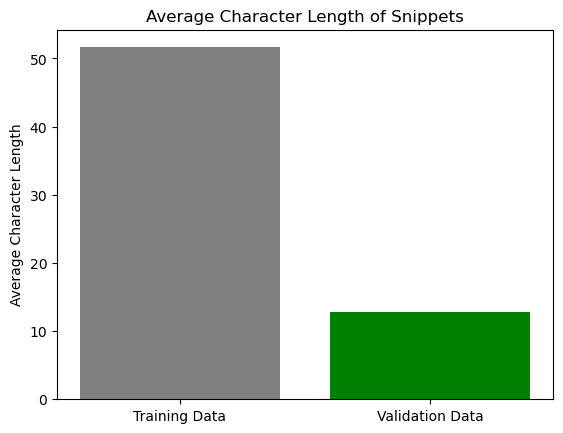

In [300]:
snippet_train=list(train_df['sentence'].apply(lambda x: snippet(x,"<BOS>","<EOS>")))
snippet_val=list(val_df['sentence'].apply(lambda x: snippet(x,"<BOS>","<EOS>")))

train_avg = average_character(snippet_train)
val_avg = average_character(snippet_val)

categories = ['Training Data', 'Validation Data']
averages = [train_avg, val_avg]

plt.bar(categories, averages, color=['gray', 'green'])
plt.ylabel('Average Character Length')
plt.title('Average Character Length of Snippets')
plt.show()

In [301]:
print("Average Character Numbers in Snippets:")
print("--------------------------")
print("Training Data: {:.2f}".format(train_avg))
print("Validation Data: {:.2f}".format(val_avg))

Average Character Numbers in Snippets:
--------------------------
Training Data: 51.64
Validation Data: 12.85


### Training Snippets for Each Label

In [302]:
avg_num_characters={}
for label in train_df.label.unique():
    dff=train_df[train_df.label==label]
    snippet_train=list(dff['sentence'].apply(lambda x: snippet(x,"<BOS>","<EOS>")))
    avg_num_characters[label]=average_character(snippet_train)

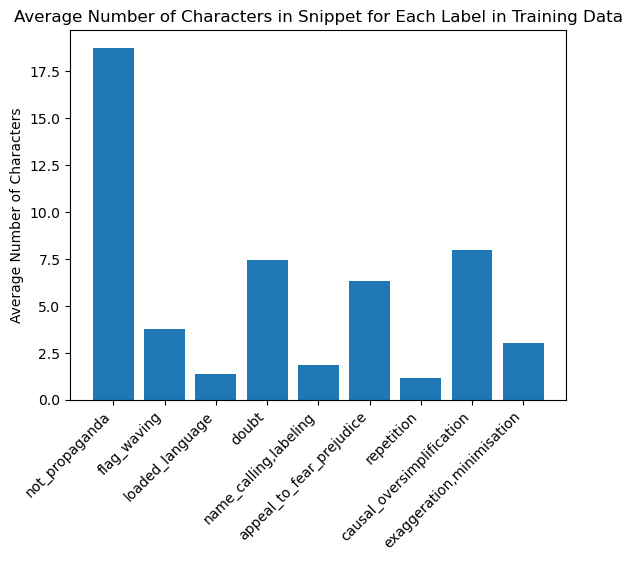

In [303]:
categories=list(avg_num_characters.keys())
values=list(avg_num_characters.values())

plt.bar(categories, values)
plt.ylabel('Average Number of Characters')
plt.title('Average Number of Characters in Snippet for Each Label in Training Data')
plt.xticks(rotation=45, ha="right")
plt.show()

In [304]:
print("Average Number of Characters in Snippet for Each Label in Training Data:")
print("----------------------------------------")
for i in avg_num_characters:
    print(i,":",avg_num_characters[i])

Average Number of Characters in Snippet for Each Label in Training Data:
----------------------------------------
not_propaganda : 18.77734375
flag_waving : 3.766015625
loaded_language : 1.37734375
doubt : 7.4203125
name_calling,labeling : 1.816796875
appeal_to_fear_prejudice : 6.315625
repetition : 1.16328125
causal_oversimplification : 7.976953125
exaggeration,minimisation : 3.028515625


### Validation Snippets for Each Label

In [305]:
avg_num_characters={}
for label in val_df.label.unique():
    dff=val_df[val_df.label==label]
    snippet_train=list(dff['sentence'].apply(lambda x: snippet(x,"<BOS>","<EOS>")))
    avg_num_characters[label]=average_character(snippet_train)

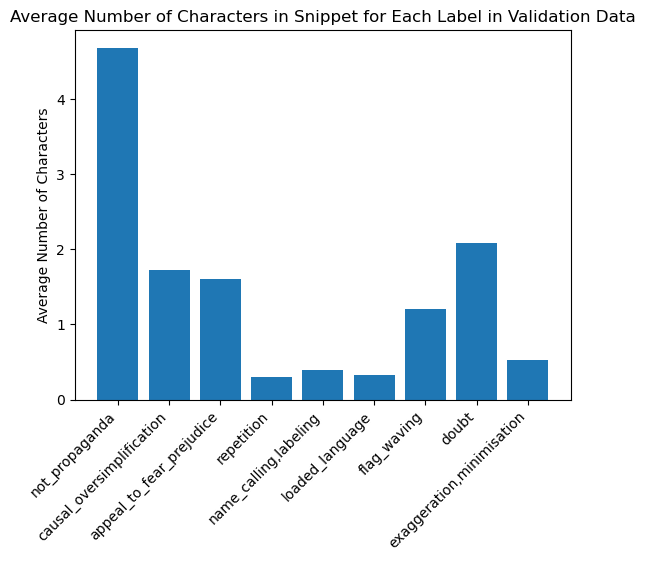

In [306]:
categories=list(avg_num_characters.keys())
values=list(avg_num_characters.values())

plt.bar(categories, values)
plt.ylabel('Average Number of Characters')
plt.title('Average Number of Characters in Snippet for Each Label in Validation Data')
plt.xticks(rotation=45, ha="right")
plt.show()

In [307]:
print("Average Number of Characters in Snippet for Each Label in Validation Data:")
print("----------------------------------------")
for i in avg_num_characters:
    print(i,":",avg_num_characters[i])

Average Number of Characters in Snippet for Each Label in Validation Data:
----------------------------------------
not_propaganda : 4.68671875
causal_oversimplification : 1.725
appeal_to_fear_prejudice : 1.609765625
repetition : 0.294140625
name_calling,labeling : 0.3953125
loaded_language : 0.32109375
flag_waving : 1.204296875
doubt : 2.08828125
exaggeration,minimisation : 0.52890625


# Task1: Propaganda Detection

In [18]:
#copying dataframes to keep the actual data save
train_df2=train_df.copy(deep=True)
val_df2=val_df.copy(deep=True)

In [19]:
#change propaganda types as propaganda
train_df2['label']=train_df2['label'].apply(lambda x: x if x=='not_propaganda' else 'propaganda')
val_df2['label']=val_df2['label'].apply(lambda x: x if x=='not_propaganda' else 'propaganda')
train_df2.head()

,label,sentence
0,not_propaganda,"No, <BOS> he <EOS> will not be confirmed."
1,not_propaganda,This declassification effort <BOS> won’t make ...
2,propaganda,"""The Obama administration misled the <BOS> Ame..."
3,not_propaganda,“It looks like we’re capturing the demise of t...
4,not_propaganda,"<BOS> Location: Westerville, Ohio <EOS>"


## Changing Propaganda Types with "Propaganda" Label

Since we want to find whether a sentence contains propaganda, we need to change the propaganda types with "propaganda" label.

In [20]:
#change propaganda types as propaganda
train_df2['label']=train_df2['label'].apply(lambda x: x if x=='not_propaganda' else 'propaganda')
val_df2['label']=val_df2['label'].apply(lambda x: x if x=='not_propaganda' else 'propaganda')
train_df2.head()

,label,sentence
0,not_propaganda,"No, <BOS> he <EOS> will not be confirmed."
1,not_propaganda,This declassification effort <BOS> won’t make ...
2,propaganda,"""The Obama administration misled the <BOS> Ame..."
3,not_propaganda,“It looks like we’re capturing the demise of t...
4,not_propaganda,"<BOS> Location: Westerville, Ohio <EOS>"


## Removing BOS and EOS Tags

Normally, we can't see any tag, when we find the data from a source such as social media. The tags **< BOS >** and **< EOS >** should be removed from each sentence.

In [21]:
#replace the tags with empty character in trainin data
train_df2['sentence']=train_df2['sentence'].apply(lambda x: x.replace("<BOS>","").replace("<EOS>","").replace("  "," "))

In [22]:
#display training data to be sure last changes
train_df2.head()

,label,sentence
0,not_propaganda,"No, he will not be confirmed."
1,not_propaganda,This declassification effort won’t make things...
2,propaganda,"""The Obama administration misled the American ..."
3,not_propaganda,“It looks like we’re capturing the demise of t...
4,not_propaganda,"Location: Westerville, Ohio"


In [23]:
#replace the tags with empty character in validation data
val_df2['sentence']=val_df2['sentence'].apply(lambda x: x.replace("<BOS>","").replace("<EOS>","").replace("  "," "))

In [24]:
#display validation data to be sure last changes
val_df2.head()

,label,sentence
0,not_propaganda,"On average, between 300 and 600 infections are..."
1,propaganda,Mostly because the country would not last long...
2,propaganda,Lyndon Johnson gets Earl Warren and Sen. Richa...
3,not_propaganda,You may opt out at anytime.
4,propaganda,It must be exacted from him directly in order ...


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
from sklearn.metrics import classification_report

In [70]:
#creating 2 dictionaries:
#labels: labels are as key, 0 and 1 are as value. Each label has a unique number

labels={}
for i,j in enumerate(train_df2.label.unique()):
    labels[j]=i
labels

{'not_propaganda': 0, 'propaganda': 1}

#### Model Test

In [27]:
x_train=list(train_df2["sentence"])
y_train=list(train_df2['label'].apply(lambda x: labels[x]))

x_val=list(val_df2["sentence"])
y_val=list(val_df2['label'].apply(lambda x: labels[x]))

In [28]:
#vectorizer on the training data
vectorizer = CountVectorizer(
    lowercase=True,
    stop_words='english',
    ngram_range=(1, 1),  # (min_n, max_n)
    analyzer="word",  # ‘char’, ‘char_wb’},
    binary=False
)
vectorizer.fit(x_train)

#transform train and validation
X_train_transformed = vectorizer.transform(x_train)
X_val_transformed = vectorizer.transform(x_val)

#train the classifier
classifier = MultinomialNB()
classifier.fit(X_train_transformed, y_train)

#evaluate classifier on validation
accuracy = classifier.score(X_val_transformed, y_val)

#print the accuracy
print(f"Validation Accuracy: {accuracy:.2f}")


Validation Accuracy: 0.70


### Finding Best Vectorizer Parameters

**The hyper parameters which can be changed for Vectorizer:**

- **lowercasebool** , default=True

- **stop_words{‘english’}**, list, default=None

- **ngram_range:**(min_n, max_n)**, default=(1, 1)

- **analyzer:** {‘word’, ‘char’, ‘char_wb’} or callable, default=’word’

- **binarybool**, default=False

## Finding Best ngram range

In [29]:
#adding n-gram ranges from (1,1) to (1,20) into the list
ngram_ranges=[]
for ranges in range(1,21):
    a=(1,ranges)
    ngram_ranges.append(a)

In [30]:
#to remove warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [31]:
#FINDING THE BEST ACCURACY
best_accuracy=0
for ngram_range in ngram_ranges:
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    vectorizer.fit(x_train)
    
    #transform both data
    X_train_transformed = vectorizer.transform(x_train)
    X_val_transformed = vectorizer.transform(x_val)
    
    #train classifier
    classifier = MultinomialNB()
    classifier.fit(X_train_transformed, y_train)
    
    #evaluate classifier on validation
    accuracy = classifier.score(X_val_transformed, y_val)
    if accuracy>best_accuracy:
        best_accuracy=accuracy
        best_ngram_range=ngram_range
    print("ngram range: {} , Accuracy: {:.2f}".format(ngram_range,accuracy))

ngram range: (1, 1) , Accuracy: 0.70
ngram range: (1, 2) , Accuracy: 0.69
ngram range: (1, 3) , Accuracy: 0.67
ngram range: (1, 4) , Accuracy: 0.66
ngram range: (1, 5) , Accuracy: 0.67
ngram range: (1, 6) , Accuracy: 0.67
ngram range: (1, 7) , Accuracy: 0.67
ngram range: (1, 8) , Accuracy: 0.67
ngram range: (1, 9) , Accuracy: 0.67
ngram range: (1, 10) , Accuracy: 0.67
ngram range: (1, 11) , Accuracy: 0.66
ngram range: (1, 12) , Accuracy: 0.66
ngram range: (1, 13) , Accuracy: 0.66
ngram range: (1, 14) , Accuracy: 0.66
ngram range: (1, 15) , Accuracy: 0.66
ngram range: (1, 16) , Accuracy: 0.67
ngram range: (1, 17) , Accuracy: 0.67
ngram range: (1, 18) , Accuracy: 0.67
ngram range: (1, 19) , Accuracy: 0.67
ngram range: (1, 20) , Accuracy: 0.67


In [32]:
print("Best n gram range: {}".format(best_ngram_range))

Best n gram range: (1, 1)


## Finding Best Parameters

In [33]:
#take some part of n-gram ranges, close to the one which has the best accuracy
ngram_ranges=[]
for ranges in range(1,6):
    a=(1,ranges)
    ngram_ranges.append(a)

In [37]:
#parameters iterated over the model to find the best ones
lowercases=[True, False]
stop_words=[None, 'english']
ngram_ranges=ngram_ranges
analyzers=['word','char','char_wb']
binaries=[False,True]

#### Finding the Best Accuracy

In [38]:
best_accuracy=0
total_numbers=len(lowercases)* len(stop_words)* len(analyzers) * len(binaries) #multiplying all values to find the number of all combinations to use in progress bar function
best_parameters=[]

#loops for iterating over all hyperparameters
with tqdm(total=total_numbers) as pbar: #progress bar
    for lowercase in lowercases:
        for stop_word in stop_words:
            for ngram_range in ngram_ranges:
                for analyzer in analyzers:
                    for binary in binaries:
                        
                        vectorizer = CountVectorizer(
                                                        lowercase=lowercase,
                                                        stop_words=stop_word,
                                                        ngram_range=ngram_range,
                                                        analyzer=analyzer,
                                                        binary=binary
                                                    )
                        
                        vectorizer.fit(x_train)
                        
                        #tranform both data
                        X_train_transformed = vectorizer.transform(x_train)
                        X_val_transformed = vectorizer.transform(x_val)
                        
                        #train classifier
                        classifier = MultinomialNB()
                        classifier.fit(X_train_transformed, y_train)
                        
                        #evaluate classifier on validation
                        accuracy_validation = classifier.score(X_val_transformed, y_val)
                    
                        #condition to get the best accuracy 
                        if accuracy_validation>best_accuracy:
                            best_accuracy=accuracy_validation
                        pbar.update(1)

print("Best validation accuracy: {:.2f}".format(best_accuracy))

                        

120it [01:39,  1.21it/s]                                                                                               

Best validation accuracy: 0.80


#### Finding the Parameters which have the best Accuracy

In [39]:
best_accuracy=best_accuracy
total_numbers=len(lowercases)* len(stop_words)* len(analyzers) * len(binaries) #multiplying all values to find the number of all combinations to use in progress bar function
best_parameters=[]

#loops for iterating over all hyperparameters
with tqdm(total=total_numbers) as pbar: #progress bar
    for lowercase in lowercases:
        for stop_word in stop_words:
            for ngram_range in ngram_ranges:
                for analyzer in analyzers:
                    for binary in binaries:
                        
                        vectorizer = CountVectorizer(
                                                        lowercase=lowercase,
                                                        stop_words=stop_word,
                                                        ngram_range=ngram_range, 
                                                        analyzer=analyzer, 
                                                        binary=binary
                                                    )
                        
                        vectorizer.fit(x_train)
                        #transform both data
                        X_train_transformed = vectorizer.transform(x_train)
                        X_val_transformed = vectorizer.transform(x_val)
                        
                        classifier = MultinomialNB()
                        #training model
                        classifier.fit(X_train_transformed, y_train)
                        
                        
                        #model score
                        accuracy_validation = classifier.score(X_val_transformed, y_val)
                        
                        
                        #the condition to find the parameters which have the accuracy equal or greater than the best one
                        if accuracy_validation>=best_accuracy:
                            print("Accuracy: {:.2f}".format(accuracy_validation))
                            
                            
                            #adding the parameters into the dictionary
                            best_vectorizer_parameters={"lowercase":lowercase,
                                                        "stop_words":stop_word,
                                                        "ngram_range":ngram_range,
                                                        "analyzer": analyzer,
                                                        "binary":binary}
                            best_parameters.append(best_vectorizer_parameters)
                        
                            print(best_vectorizer_parameters)
                            
                            
                            best_accuracy=accuracy_validation
                        pbar.update(1)


                        

 67%|██████████████████████████████████████████████████████▋                           | 16/24 [00:06<00:05,  1.53it/s]

Accuracy: 0.80
{'lowercase': True, 'stop_words': None, 'ngram_range': (1, 3), 'analyzer': 'char', 'binary': True}


46it [00:32,  1.49it/s]                                                                                                

Accuracy: 0.80
{'lowercase': True, 'stop_words': 'english', 'ngram_range': (1, 3), 'analyzer': 'char', 'binary': True}


120it [01:37,  1.23it/s]


In [40]:
#creating a dataframe to see the best parameters
df_best_par=pd.DataFrame(best_parameters)
df_best_par

,lowercase,stop_words,ngram_range,analyzer,binary
0,True,None,"(1, 3)",char,True
1,True,english,"(1, 3)",char,True


### For the first parameters

In [41]:
vectorizer = CountVectorizer(lowercase=True,
                             stop_words=None,
                             ngram_range=(1,3),
                             analyzer="char",
                             binary=True)

vectorizer.fit(x_train)
X_train_transformed = vectorizer.transform(x_train)
X_val_transformed = vectorizer.transform(x_val)

classifier = MultinomialNB()

#training model
classifier.fit(X_train_transformed, y_train)

#model predictions
predictions=classifier.predict(X_val_transformed)

report = classification_report(y_val, predictions, zero_division=0, output_dict=True)
#convert it into dataframe
df_report_train1 = pd.DataFrame(report).transpose()
print("Model Performance")
df_report_train1

Model Performance


,precision,recall,f1-score,support
0,0.843333,0.764350,0.801902,331.000000
1,0.770588,0.847896,0.807396,309.000000
accuracy,0.804688,0.804688,0.804688,0.804688
macro avg,0.806961,0.806123,0.804649,640.000000
weighted avg,0.808211,0.804688,0.804554,640.000000


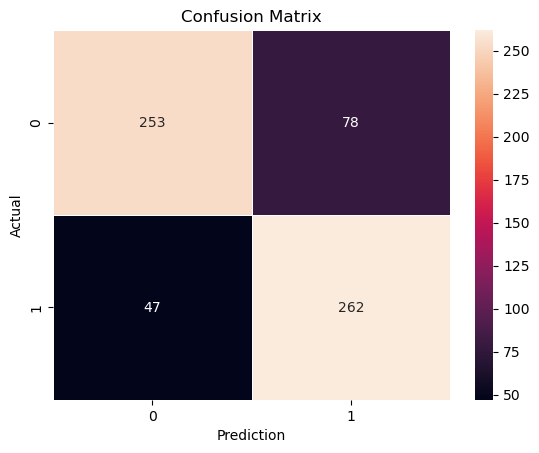

In [42]:
#plot confusion matrix
plt.figure()
cm = confusion_matrix(y_val, predictions)
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

### For the second parameters

In [43]:
vectorizer = CountVectorizer(lowercase=True,
                             stop_words="english",
                             ngram_range=(1,3),
                             analyzer="char",
                             binary=True)

vectorizer.fit(x_train)
X_train_transformed = vectorizer.transform(x_train)
X_val_transformed = vectorizer.transform(x_val)

classifier = MultinomialNB()

#training model
classifier.fit(X_train_transformed, y_train)

#model predictions
predictions=classifier.predict(X_val_transformed)

report = classification_report(y_val, predictions, zero_division=0, output_dict=True)
#convert it into dataframe
df_report_train1 = pd.DataFrame(report).transpose()
print("Model Performance")
df_report_train1

Model Performance


,precision,recall,f1-score,support
0,0.843333,0.764350,0.801902,331.000000
1,0.770588,0.847896,0.807396,309.000000
accuracy,0.804688,0.804688,0.804688,0.804688
macro avg,0.806961,0.806123,0.804649,640.000000
weighted avg,0.808211,0.804688,0.804554,640.000000


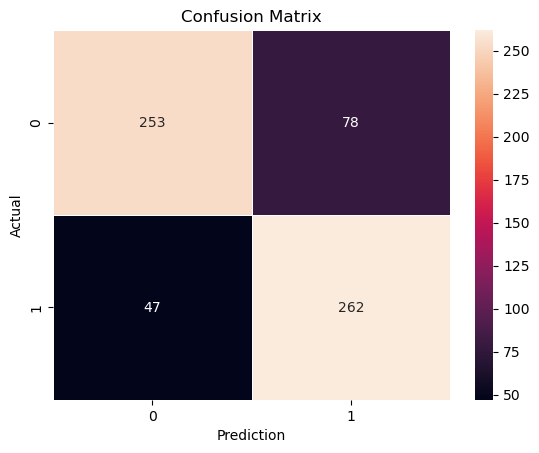

In [44]:
#plot confusion matrix
plt.figure()
cm = confusion_matrix(y_val, predictions)
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

As it can be seen above, both models are equal for vectorizer

### Finding Best Model Parameters

**The hyper parameters which can be changed for Model:**

- **alpha:** float or array-like of shape (n_features,), default=1.0

- **force_alpha:** bool, default=True

In [78]:
#adding different parameter values into the list
alphas=[0, 0.0001,0.001, 0.01, 0.1, 0.1, 0.2, 0.25, 0.5, 0.6, 0.7, 0.75, 1, 1.25, 1.5, 1.75, 2]
force_alphas=[True, False]

In [79]:
best_accuracy=0
total_numbers=len(alphas)* len(force_alphas) #multiplying all values to find the number of all combinations to use in progress bar function
best_parameters=[]
with tqdm(total=total_numbers) as pbar: #progress bar 
    for force_alpha in force_alphas:
        for alpha in alphas:
            
            vectorizer = CountVectorizer()
            
            vectorizer.fit(x_train)
            X_train_transformed = vectorizer.transform(x_train)
            X_val_transformed = vectorizer.transform(x_val)
            
            classifier = MultinomialNB(alpha=alpha,
                                       force_alpha=force_alpha)
            
            classifier.fit(X_train_transformed, y_train)
            accuracy_validation = classifier.score(X_val_transformed, y_val)
            
            
            if accuracy_validation>best_accuracy:
                best_accuracy=accuracy_validation
            pbar.update(1)

print("Best validation accuracy: {:.2f}".format(best_accuracy))

                        

  0%|                                                                                           | 0/34 [00:00<?, ?it/s]C:\Users\Mert\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
100%|██████████████████████████████████████████████████████████████████████████████████| 34/34 [00:03<00:00,  9.55it/s]

Best validation accuracy: 0.71


In [80]:
best_accuracy=best_accuracy
total_numbers=len(alphas)* len(force_alphas)
best_parameters=[]
with tqdm(total=total_numbers) as pbar:
    for force_alpha in force_alphas:
        for alpha in alphas:
                        
            vectorizer = CountVectorizer()
            
            vectorizer.fit(x_train)
            X_train_transformed = vectorizer.transform(x_train)
            X_val_transformed = vectorizer.transform(x_val)
            
            classifier = MultinomialNB(alpha=alpha,
                                       force_alpha=force_alpha)
            #training model
            classifier.fit(X_train_transformed, y_train)
            
            
            #model score
            accuracy_validation = classifier.score(X_val_transformed, y_val)
            
            
            if accuracy_validation>=best_accuracy:
                print("Accuracy: {:.2f}".format(accuracy_validation))
                
                
                
                best_model_parameters={"alpha":alpha,
                                            "force_alpha":force_alpha}
                
                best_parameters.append(best_model_parameters)
            
                print(best_model_parameters)
                
                
                best_accuracy=accuracy_validation
            pbar.update(1)         

  0%|                                                                                           | 0/34 [00:00<?, ?it/s]C:\Users\Mert\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
 41%|█████████████████████████████████▊                                                | 14/34 [00:01<00:02,  9.69it/s]

Accuracy: 0.71
{'alpha': 0.75, 'force_alpha': True}


 88%|████████████████████████████████████████████████████████████████████████▎         | 30/34 [00:03<00:00,  9.96it/s]

Accuracy: 0.71
{'alpha': 0.75, 'force_alpha': False}


100%|██████████████████████████████████████████████████████████████████████████████████| 34/34 [00:03<00:00,  9.84it/s]


In [81]:
df_best_par=pd.DataFrame(best_parameters)
df_best_par

,alpha,force_alpha
0,0.75,True
1,0.75,False


### For the first parameters

In [82]:
vectorizer = CountVectorizer()

vectorizer.fit(x_train)
X_train_transformed = vectorizer.transform(x_train)
X_val_transformed = vectorizer.transform(x_val)

classifier = MultinomialNB(alpha=0.75,
                           force_alpha=True)

#training model
classifier.fit(X_train_transformed, y_train)

#model predictions
predictions=classifier.predict(X_val_transformed)

report = classification_report(y_val, predictions, zero_division=0, output_dict=True)
#convert it into dataframe
df_report_train1 = pd.DataFrame(report).transpose()
print("Model Performance")
df_report_train1

Model Performance


,precision,recall,f1-score,support
0,0.787149,0.592145,0.675862,331.00000
1,0.654731,0.828479,0.731429,309.00000
accuracy,0.706250,0.706250,0.706250,0.70625
macro avg,0.720940,0.710312,0.703645,640.00000
weighted avg,0.723216,0.706250,0.702690,640.00000


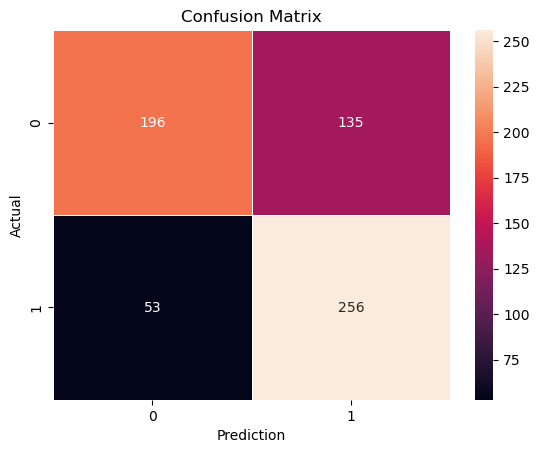

In [83]:
# Plot confusion matrix
plt.figure()
cm = confusion_matrix(y_val, predictions)
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

### For the second parameters

In [84]:
vectorizer = CountVectorizer()

vectorizer.fit(x_train)
X_train_transformed = vectorizer.transform(x_train)
X_val_transformed = vectorizer.transform(x_val)

classifier = MultinomialNB(alpha=0.75,
                           force_alpha=False)

#training model
classifier.fit(X_train_transformed, y_train)

#model predictions
predictions=classifier.predict(X_val_transformed)

report = classification_report(y_val, predictions, zero_division=0, output_dict=True)
#convert it into dataframe
df_report_train1 = pd.DataFrame(report).transpose()
print("Model Performance")
df_report_train1

Model Performance


,precision,recall,f1-score,support
0,0.787149,0.592145,0.675862,331.00000
1,0.654731,0.828479,0.731429,309.00000
accuracy,0.706250,0.706250,0.706250,0.70625
macro avg,0.720940,0.710312,0.703645,640.00000
weighted avg,0.723216,0.706250,0.702690,640.00000


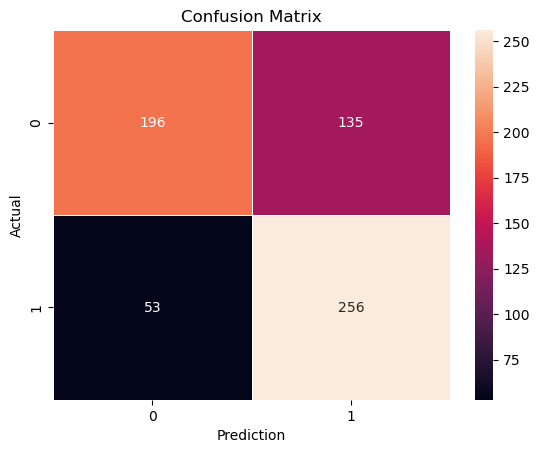

In [85]:
# Plot confusion matrix
plt.figure()
cm = confusion_matrix(y_val, predictions)
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

According to the results, it can be seen that both models are the same as each other with these parameters

### Model with Best Parameters:


**For Vectorizer:**
- **lowercase:**  True

- **stop_words:** None or english 	

- **ngram_range:** (1,3)

- **analyzer:** char

- **binary:** True


**For Model:**
- **alpha:** 0.75

- **force_alpha:** True or False

In [90]:
lowercases=[True]
stop_words=[None, 'english']
ngram_ranges=[(1,3)]
analyzers=['char']
binaries=[True]

In [91]:
alphas=[0.75]
force_alphas=[True, False]

#### Finding the Best Accuracy with this parameters

In [93]:
best_accuracy=0
total_numbers=len(lowercases)* len(stop_words)* len(ngram_ranges)* len(analyzers) * len(binaries) * len(alphas) * len(force_alphas) #multiplying all values to find the number of all combinations to use in progress bar function
best_parameters=[]
with tqdm(total=total_numbers) as pbar:
    for lowercase in lowercases:
        for stop_word in stop_words:
            for ngram_range in ngram_ranges:
                for analyzer in analyzers:
                    for binary in binaries:
                        for alpha in alphas:
                            for force_alpha in force_alphas:
                        
                                vectorizer = CountVectorizer(
                                                                lowercase=lowercase,
                                                                stop_words=stop_word,
                                                                ngram_range=ngram_range,
                                                                analyzer=analyzer,
                                                                binary=binary
                                                            )
                                
                                vectorizer.fit(x_train)
                                X_train_transformed = vectorizer.transform(x_train)
                                X_val_transformed = vectorizer.transform(x_val)
                                
                                classifier = MultinomialNB(alpha=alpha,
                                                           force_alpha=force_alpha)
                                
                                classifier.fit(X_train_transformed, y_train)
                                accuracy_validation = classifier.score(X_val_transformed, y_val)
                                
                                
                                
                                if accuracy_validation>best_accuracy:
                                    best_accuracy=accuracy_validation
                                pbar.update(1)
        
print("Best validation accuracy: {:.2f}".format(best_accuracy))

                        

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.21it/s]

Best validation accuracy: 0.81


In [111]:
lowercases=[True]
stop_words=[None, 'english']
ngram_ranges=[(1,i) for i in range(1,6)]
analyzers=['char']
binaries=[True]

alphas=[i for i in np.linspace(0, 1, 21)]
force_alphas=[True] 

False was excluded at first. After finding a result it will be compared with the True result

#### Finding the Parameters which have the best Accuracy or higher

In [112]:
best_accuracy=best_accuracy
total_numbers=len(lowercases)* len(stop_words)* len(ngram_ranges)* len(analyzers) * len(binaries) * len(alphas) * len(force_alphas)
best_parameters=[]
with tqdm(total=total_numbers) as pbar:
    for lowercase in lowercases:
        for stop_word in stop_words:
            for ngram_range in ngram_ranges:
                for analyzer in analyzers:
                    for binary in binaries:
                        for alpha in alphas:
                            for force_alpha in force_alphas:
                        
                                vectorizer = CountVectorizer(
                                                                lowercase=lowercase,
                                                                stop_words=stop_word,
                                                                ngram_range=ngram_range,  
                                                                analyzer=analyzer, 
                                                                binary=binary
                                                            )
                                
                                vectorizer.fit(x_train)
                                X_train_transformed = vectorizer.transform(x_train)
                                X_val_transformed = vectorizer.transform(x_val)
                                
                                classifier = MultinomialNB(alpha=alpha,
                                                           force_alpha=force_alpha)
                                
                                #training model
                                classifier.fit(X_train_transformed, y_train)
                                
                                
                                #model score
                                accuracy_validation = classifier.score(X_val_transformed, y_val)
                                
                                
                                if accuracy_validation>=best_accuracy:
                                    print("Accuracy: {:.2f}".format(accuracy_validation))
                                    
                                    
                                    
                                    best_vm_parameters={"lowercase":lowercase,
                                                                "stop_words":stop_word,
                                                                "ngram_range":ngram_range,
                                                                "analyzer": analyzer,
                                                                "binary":binary,
                                                                "alpha":alpha,
                                                                "force_alpha":force_alpha}
                                    best_parameters.append(best_vm_parameters)
                                
                                    print(best_vm_parameters)
                                    
                                    
                                    best_accuracy=accuracy_validation
                                pbar.update(1)
        
        
                        

  0%|                                                                                          | 0/210 [00:00<?, ?it/s]C:\Users\Mert\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
 10%|████████                                                                         | 21/210 [00:02<00:26,  7.07it/s]C:\Users\Mert\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
 20%|████████████████▏                                                                | 42/210 [00:12<01:13,  2.28it/s]C:\Users\Mert\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
 22%|█████████████████▋                                                               | 46/210 [00:15<02:00,  1.

Accuracy: 0.81
{'lowercase': True, 'stop_words': None, 'ngram_range': (1, 3), 'analyzer': 'char', 'binary': True, 'alpha': 0.15000000000000002, 'force_alpha': True}



 22%|██████████████████▏                                                              | 47/210 [00:16<02:04,  1.31it/s]

Accuracy: 0.81
{'lowercase': True, 'stop_words': None, 'ngram_range': (1, 3), 'analyzer': 'char', 'binary': True, 'alpha': 0.2, 'force_alpha': True}



 23%|██████████████████▌                                                              | 48/210 [00:17<02:08,  1.26it/s]

Accuracy: 0.81
{'lowercase': True, 'stop_words': None, 'ngram_range': (1, 3), 'analyzer': 'char', 'binary': True, 'alpha': 0.25, 'force_alpha': True}


 24%|███████████████████▎                                                             | 50/210 [00:19<02:10,  1.23it/s]

Accuracy: 0.81
{'lowercase': True, 'stop_words': None, 'ngram_range': (1, 3), 'analyzer': 'char', 'binary': True, 'alpha': 0.35000000000000003, 'force_alpha': True}


 30%|████████████████████████▎                                                        | 63/210 [00:29<02:08,  1.14it/s]C:\Users\Mert\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
 40%|████████████████████████████████▍                                                | 84/210 [00:57<02:52,  1.37s/it]C:\Users\Mert\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
 50%|████████████████████████████████████████                                        | 105/210 [01:38<03:21,  1.91s/it]C:\Users\Mert\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
 60%|████████████████████████████████████████████████                                | 126/210 [01:41<00:11,  7.

Accuracy: 0.81
{'lowercase': True, 'stop_words': 'english', 'ngram_range': (1, 3), 'analyzer': 'char', 'binary': True, 'alpha': 0.15000000000000002, 'force_alpha': True}



 72%|█████████████████████████████████████████████████████████▉                      | 152/210 [01:54<00:43,  1.35it/s]

Accuracy: 0.81
{'lowercase': True, 'stop_words': 'english', 'ngram_range': (1, 3), 'analyzer': 'char', 'binary': True, 'alpha': 0.2, 'force_alpha': True}



 73%|██████████████████████████████████████████████████████████▎                     | 153/210 [01:55<00:43,  1.32it/s]

Accuracy: 0.81
{'lowercase': True, 'stop_words': 'english', 'ngram_range': (1, 3), 'analyzer': 'char', 'binary': True, 'alpha': 0.25, 'force_alpha': True}


 74%|███████████████████████████████████████████████████████████                     | 155/210 [01:56<00:42,  1.28it/s]

Accuracy: 0.81
{'lowercase': True, 'stop_words': 'english', 'ngram_range': (1, 3), 'analyzer': 'char', 'binary': True, 'alpha': 0.35000000000000003, 'force_alpha': True}


 80%|████████████████████████████████████████████████████████████████                | 168/210 [02:07<00:35,  1.18it/s]C:\Users\Mert\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
 90%|████████████████████████████████████████████████████████████████████████        | 189/210 [02:34<00:27,  1.30s/it]C:\Users\Mert\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
100%|████████████████████████████████████████████████████████████████████████████████| 210/210 [03:16<00:00,  1.07it/s]


In [115]:
df_best_vm=pd.DataFrame(best_parameters)
df_best_vm

,lowercase,stop_words,ngram_range,analyzer,binary,alpha,force_alpha
0,True,None,"(1, 3)",char,True,0.15,True
1,True,None,"(1, 3)",char,True,0.20,True
2,True,None,"(1, 3)",char,True,0.25,True
3,True,None,"(1, 3)",char,True,0.35,True
4,True,english,"(1, 3)",char,True,0.15,True
5,True,english,"(1, 3)",char,True,0.20,True
6,True,english,"(1, 3)",char,True,0.25,True
7,True,english,"(1, 3)",char,True,0.35,True


#### Comparison False with True in force_alpha

In [134]:
lowercases=[True]
stop_words=[None, 'english']
ngram_ranges=[(1,i) for i in range(1,4)]
analyzers=['char']
binaries=[True]

alphas=[i for i in np.linspace(0, 0.5, 11)]
force_alphas=[False] 

In [135]:
best_accuracy=best_accuracy
total_numbers=len(lowercases)* len(stop_words)* len(ngram_ranges)* len(analyzers) * len(binaries) * len(alphas) * len(force_alphas)
best_parameters=[]
with tqdm(total=total_numbers) as pbar:
    for lowercase in lowercases:
        for stop_word in stop_words:
            for ngram_range in ngram_ranges:
                for analyzer in analyzers:
                    for binary in binaries:
                        for alpha in alphas:
                            for force_alpha in force_alphas:
                        
                                vectorizer = CountVectorizer(
                                                                lowercase=lowercase,
                                                                stop_words=stop_word,
                                                                ngram_range=ngram_range,  
                                                                analyzer=analyzer, 
                                                                binary=binary
                                                            )
                                
                                vectorizer.fit(x_train)
                                X_train_transformed = vectorizer.transform(x_train)
                                X_val_transformed = vectorizer.transform(x_val)
                                
                                classifier = MultinomialNB(alpha=alpha,
                                                           force_alpha=force_alpha)
                                
                                #training model
                                classifier.fit(X_train_transformed, y_train)
                                
                                
                                #model score
                                accuracy_validation = classifier.score(X_val_transformed, y_val)
                                
                                
                                if accuracy_validation>=best_accuracy:
                                    print("Accuracy: {:.2f}".format(accuracy_validation))
                                    
                                    
                                    
                                    best_vm_parameters={"lowercase":lowercase,
                                                                "stop_words":stop_word,
                                                                "ngram_range":ngram_range,
                                                                "analyzer": analyzer,
                                                                "binary":binary,
                                                                "alpha":alpha,
                                                                "force_alpha":force_alpha}
                                    best_parameters.append(best_vm_parameters)
                                
                                    print(best_vm_parameters)
                                    
                                    
                                    best_accuracy=accuracy_validation
                                pbar.update(1)
        
        
                        

 39%|████████████████████████████████▎                                                 | 26/66 [00:09<00:28,  1.41it/s]

Accuracy: 0.81
{'lowercase': True, 'stop_words': None, 'ngram_range': (1, 3), 'analyzer': 'char', 'binary': True, 'alpha': 0.15000000000000002, 'force_alpha': False}



 41%|█████████████████████████████████▌                                                | 27/66 [00:10<00:28,  1.36it/s]

Accuracy: 0.81
{'lowercase': True, 'stop_words': None, 'ngram_range': (1, 3), 'analyzer': 'char', 'binary': True, 'alpha': 0.2, 'force_alpha': False}



 42%|██████████████████████████████████▊                                               | 28/66 [00:11<00:28,  1.31it/s]

Accuracy: 0.81
{'lowercase': True, 'stop_words': None, 'ngram_range': (1, 3), 'analyzer': 'char', 'binary': True, 'alpha': 0.25, 'force_alpha': False}


 45%|█████████████████████████████████████▎                                            | 30/66 [00:12<00:28,  1.26it/s]

Accuracy: 0.81
{'lowercase': True, 'stop_words': None, 'ngram_range': (1, 3), 'analyzer': 'char', 'binary': True, 'alpha': 0.35000000000000003, 'force_alpha': False}


 89%|█████████████████████████████████████████████████████████████████████████▎        | 59/66 [00:25<00:05,  1.32it/s]

Accuracy: 0.81
{'lowercase': True, 'stop_words': 'english', 'ngram_range': (1, 3), 'analyzer': 'char', 'binary': True, 'alpha': 0.15000000000000002, 'force_alpha': False}



 91%|██████████████████████████████████████████████████████████████████████████▌       | 60/66 [00:26<00:04,  1.28it/s]

Accuracy: 0.81
{'lowercase': True, 'stop_words': 'english', 'ngram_range': (1, 3), 'analyzer': 'char', 'binary': True, 'alpha': 0.2, 'force_alpha': False}



 92%|███████████████████████████████████████████████████████████████████████████▊      | 61/66 [00:27<00:03,  1.25it/s]

Accuracy: 0.81
{'lowercase': True, 'stop_words': 'english', 'ngram_range': (1, 3), 'analyzer': 'char', 'binary': True, 'alpha': 0.25, 'force_alpha': False}


 95%|██████████████████████████████████████████████████████████████████████████████▎   | 63/66 [00:28<00:02,  1.22it/s]

Accuracy: 0.81
{'lowercase': True, 'stop_words': 'english', 'ngram_range': (1, 3), 'analyzer': 'char', 'binary': True, 'alpha': 0.35000000000000003, 'force_alpha': False}


100%|██████████████████████████████████████████████████████████████████████████████████| 66/66 [00:31<00:00,  2.10it/s]


In [136]:
df_best_vm=pd.DataFrame(best_parameters)
df_best_vm

,lowercase,stop_words,ngram_range,analyzer,binary,alpha,force_alpha
0,True,None,"(1, 3)",char,True,0.15,False
1,True,None,"(1, 3)",char,True,0.20,False
2,True,None,"(1, 3)",char,True,0.25,False
3,True,None,"(1, 3)",char,True,0.35,False
4,True,english,"(1, 3)",char,True,0.15,False
5,True,english,"(1, 3)",char,True,0.20,False
6,True,english,"(1, 3)",char,True,0.25,False
7,True,english,"(1, 3)",char,True,0.35,False


As it can be seen that changing force_alpha didn't change the model's accuracy.

# Model Evaluation with the Chosen Parameters

**For Vectorizer:**
- **lowercase:**  True

- **stop_words:** None or english (None was preferred to not to change anything)	

- **ngram_range:** (1,3)

- **analyzer:** char

- **binary:** True


**For Model:**
- **alpha:** between 0.15 and 0.35 (I chose the average 0.25)

- **force_alpha:** True or False (I chose True, default value)

In [137]:
vectorizer = CountVectorizer(lowercase=True,
                             stop_words=None,
                             ngram_range=(1,3),
                             analyzer="char",
                             binary=True)

vectorizer.fit(x_train)
X_train_transformed = vectorizer.transform(x_train)
X_val_transformed = vectorizer.transform(x_val)

classifier = MultinomialNB(alpha=0.25,
                           force_alpha=True)

#training model
classifier.fit(X_train_transformed, y_train)

#model predictions
predictions=classifier.predict(X_val_transformed)

report = classification_report(y_val, predictions, zero_division=0, output_dict=True)
#convert it into dataframe
df_report_train1 = pd.DataFrame(report).transpose()
print("Model Performance")
df_report_train1

Model Performance


,precision,recall,f1-score,support
0,0.843648,0.782477,0.811912,331.0000
1,0.783784,0.844660,0.813084,309.0000
accuracy,0.812500,0.812500,0.812500,0.8125
macro avg,0.813716,0.813569,0.812498,640.0000
weighted avg,0.814745,0.812500,0.812478,640.0000


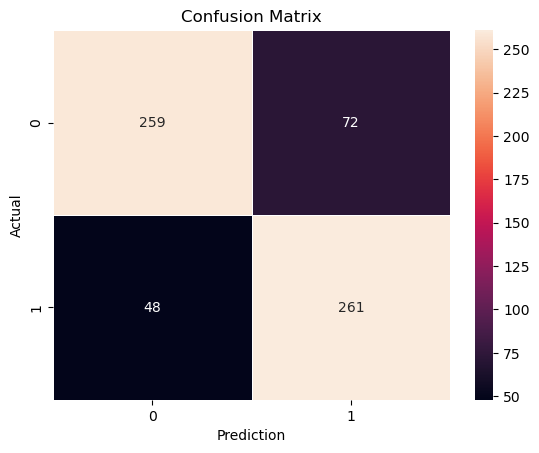

In [138]:
# Plot confusion matrix
plt.figure()
cm = confusion_matrix(y_val, predictions)
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

# Task2: Propaganda Classification

In [139]:
train_df3=train_df.copy(deep=True) #copy training dataframe
val_df3=val_df.copy(deep=True) #copy validation dataframe

## Excluding not_propaganda from Dataframe

In [140]:
train_df3=train_df3[train_df3['label']!='not_propaganda']
val_df3=val_df3[val_df3['label']!='not_propaganda']

## Taking the Snippets

In [141]:
#function which gives the text between specified characters
def snippet(text,first_tag,second_tag):
    starting=text.find(first_tag)
    ending=text.find(second_tag)
    return text[starting+6:ending-1]

In [142]:
#changing sentence column with the records of snippets
train_df3['sentence']=train_df3['sentence'].apply(lambda x: snippet(x,"<BOS>","<EOS>"))
val_df3['sentence']=val_df3['sentence'].apply(lambda x: snippet(x,"<BOS>","<EOS>"))

In [143]:
#to check changes
train_df3.head()

,label,sentence
2,flag_waving,American people
5,loaded_language,annihilated
8,doubt,so-called evidence
10,"name_calling,labeling",hateful conduct
12,appeal_to_fear_prejudice,point to Iran’s positioning itself for more ag...


In [145]:
#finding labels
labels={}
for i,j in enumerate(train_df3.label.unique()):
    labels[j]=i
labels

{'flag_waving': 0,
 'loaded_language': 1,
 'doubt': 2,
 'name_calling,labeling': 3,
 'appeal_to_fear_prejudice': 4,
 'repetition': 5,
 'causal_oversimplification': 6,
 'exaggeration,minimisation': 7}

#### Model Test

In [146]:
x_train=list(train_df3["sentence"])
y_train=list(train_df3['label'].apply(lambda x: labels[x]))

x_val=list(val_df3["sentence"])
y_val=list(val_df3['label'].apply(lambda x: labels[x]))

In [147]:
# Fit the vectorizer on the training data
vectorizer = CountVectorizer(
    lowercase=True,
    stop_words='english',
    ngram_range=(1, 1),  # (min_n, max_n)
    analyzer="word",  # ‘char’, ‘char_wb’},
    binary=False
)
vectorizer.fit(x_train)

# Transform both training and validation data
X_train_transformed = vectorizer.transform(x_train)
X_val_transformed = vectorizer.transform(x_val)

# Training the classifier
classifier = MultinomialNB()
classifier.fit(X_train_transformed, y_train)

# Evaluating the classifier on the validation set
accuracy = classifier.score(X_val_transformed, y_val)
print(f"Validation Accuracy: {accuracy:.2f}")


Validation Accuracy: 0.39


### Finding Best Vectorizer Parameters

**The hyper parameters which can be changed for Vectorizer:**

- **lowercasebool** , default=True

- **stop_words{‘english’}**, list, default=None

- **ngram_range:**(min_n, max_n)**, default=(1, 1)

- **analyzer:** {‘word’, ‘char’, ‘char_wb’} or callable, default=’word’

- **binarybool**, default=False

## Finding Best ngram range

In [53]:
ngram_ranges=[]
for ranges in range(1,21):
    a=(1,ranges)
    ngram_ranges.append(a)

In [54]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [55]:
best_accuracy=0
for ngram_range in ngram_ranges:
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    vectorizer.fit(x_train)
    X_train_transformed = vectorizer.transform(x_train)
    X_val_transformed = vectorizer.transform(x_val)
    
    # Training the classifier
    classifier = MultinomialNB()
    classifier.fit(X_train_transformed, y_train)
    
    # Evaluating the classifier on the validation set
    accuracy = classifier.score(X_val_transformed, y_val)
    if accuracy>best_accuracy:
        best_accuracy=accuracy
        best_ngram_range=ngram_range
    print("ngram range: {} , Accuracy: {:.2f}".format(ngram_range,accuracy))

ngram range: (1, 1) , Accuracy: 0.42
ngram range: (1, 2) , Accuracy: 0.40
ngram range: (1, 3) , Accuracy: 0.41
ngram range: (1, 4) , Accuracy: 0.41
ngram range: (1, 5) , Accuracy: 0.40
ngram range: (1, 6) , Accuracy: 0.40
ngram range: (1, 7) , Accuracy: 0.40
ngram range: (1, 8) , Accuracy: 0.40
ngram range: (1, 9) , Accuracy: 0.40
ngram range: (1, 10) , Accuracy: 0.40
ngram range: (1, 11) , Accuracy: 0.40
ngram range: (1, 12) , Accuracy: 0.40
ngram range: (1, 13) , Accuracy: 0.40
ngram range: (1, 14) , Accuracy: 0.40
ngram range: (1, 15) , Accuracy: 0.40
ngram range: (1, 16) , Accuracy: 0.40
ngram range: (1, 17) , Accuracy: 0.40
ngram range: (1, 18) , Accuracy: 0.40
ngram range: (1, 19) , Accuracy: 0.40
ngram range: (1, 20) , Accuracy: 0.41


In [56]:
print("Best n gram range: {}".format(best_ngram_range))

Best n gram range: (1, 1)


## Finding Best Parameters

In [57]:
ngram_ranges=[]
for ranges in range(1,6):
    a=(1,ranges)
    ngram_ranges.append(a)

In [58]:
lowercases=[True, False]
stop_words=[None, 'english']
ngram_ranges=ngram_ranges
analyzers=['word','char','char_wb']
binaries=[False,True]

#### Finding the Best Accuracy

In [59]:
best_accuracy=0
total_numbers=len(lowercases)* len(stop_words)* len(analyzers) * len(binaries)
best_parameters=[]
with tqdm(total=total_numbers) as pbar:
    for lowercase in lowercases:
        for stop_word in stop_words:
            for ngram_range in ngram_ranges:
                for analyzer in analyzers:
                    for binary in binaries:
                        
                        vectorizer = CountVectorizer(
                                                        lowercase=lowercase,
                                                        stop_words=stop_word,
                                                        ngram_range=ngram_range,  # (min_n, max_n)
                                                        analyzer=analyzer,  # ‘char’, ‘char_wb’},
                                                        binary=binary
                                                    )
                        
                        vectorizer.fit(x_train)
                        X_train_transformed = vectorizer.transform(x_train)
                        X_val_transformed = vectorizer.transform(x_val)
                        
                        classifier = MultinomialNB()
                        classifier.fit(X_train_transformed, y_train)
                        accuracy_validation = classifier.score(X_val_transformed, y_val)
                        
                        
                        
                        if accuracy_validation>best_accuracy:
                            best_accuracy=accuracy_validation
                        pbar.update(1)

print("Best validation accuracy: {:.2f}".format(best_accuracy))

                        

120it [00:21,  5.53it/s]                                                                                               

Best validation accuracy: 0.46


#### Finding the Parameters which have the best Accuracy

In [60]:
best_accuracy=best_accuracy
total_numbers=len(lowercases)* len(stop_words)* len(analyzers) * len(binaries)
best_parameters=[]
with tqdm(total=total_numbers) as pbar:
    for lowercase in lowercases:
        for stop_word in stop_words:
            for ngram_range in ngram_ranges:
                for analyzer in analyzers:
                    for binary in binaries:
                        
                        vectorizer = CountVectorizer(
                                                        lowercase=lowercase,
                                                        stop_words=stop_word,
                                                        ngram_range=ngram_range,  # (min_n, max_n)
                                                        analyzer=analyzer,  # ‘char’, ‘char_wb’},
                                                        binary=binary
                                                    )
                        
                        vectorizer.fit(x_train)
                        X_train_transformed = vectorizer.transform(x_train)
                        X_val_transformed = vectorizer.transform(x_val)
                        
                        classifier = MultinomialNB()
                        #training model
                        classifier.fit(X_train_transformed, y_train)
                        
                        
                        #model score
                        accuracy_validation = classifier.score(X_val_transformed, y_val)
                        
                        
                        if accuracy_validation>=best_accuracy:
                            print("Accuracy: {:.2f}".format(accuracy_validation))
                            
                            
                            
                            best_vectorizer_parameters={"lowercase":lowercase,
                                                        "stop_words":stop_word,
                                                        "ngram_range":ngram_range,
                                                        "analyzer": analyzer,
                                                        "binary":binary}
                            best_parameters.append(best_vectorizer_parameters)
                        
                            print(best_vectorizer_parameters)
                            
                            
                            best_accuracy=accuracy_validation
                        pbar.update(1)


                        

 79%|████████████████████████████████████████████████████████████████▉                 | 19/24 [00:02<00:00,  6.31it/s]

Accuracy: 0.46
{'lowercase': True, 'stop_words': None, 'ngram_range': (1, 3), 'analyzer': 'char_wb', 'binary': True}


50it [00:08,  7.10it/s]                                                                                                

Accuracy: 0.46
{'lowercase': True, 'stop_words': 'english', 'ngram_range': (1, 3), 'analyzer': 'char_wb', 'binary': True}


120it [00:22,  5.40it/s]


In [61]:
df_best_par=pd.DataFrame(best_parameters)
df_best_par

,lowercase,stop_words,ngram_range,analyzer,binary
0,True,None,"(1, 3)",char_wb,True
1,True,english,"(1, 3)",char_wb,True


### For the first parameters

In [62]:
vectorizer = CountVectorizer(lowercase=True,
                             stop_words=None,
                             ngram_range=(1,3),
                             analyzer="char_wb",
                             binary=True)

vectorizer.fit(x_train)
X_train_transformed = vectorizer.transform(x_train)
X_val_transformed = vectorizer.transform(x_val)

classifier = MultinomialNB()

#training model
classifier.fit(X_train_transformed, y_train)

#model predictions
predictions=classifier.predict(X_val_transformed)

report = classification_report(y_val, predictions, zero_division=0, output_dict=True)
#convert it into dataframe
df_report_train1 = pd.DataFrame(report).transpose()
print("Model Performance")
df_report_train1

Model Performance


,precision,recall,f1-score,support
0,0.619048,0.577778,0.597701,45.000000
1,0.500000,0.256410,0.338983,39.000000
2,0.530612,0.604651,0.565217,43.000000
3,0.500000,0.323529,0.392857,34.000000
4,0.375000,0.418605,0.395604,43.000000
5,0.923077,0.300000,0.452830,40.000000
6,0.375000,0.685714,0.484848,35.000000
7,0.294118,0.500000,0.370370,30.000000
accuracy,0.459547,0.459547,0.459547,0.459547
macro avg,0.514607,0.458336,0.449802,309.000000


### For the second parameters

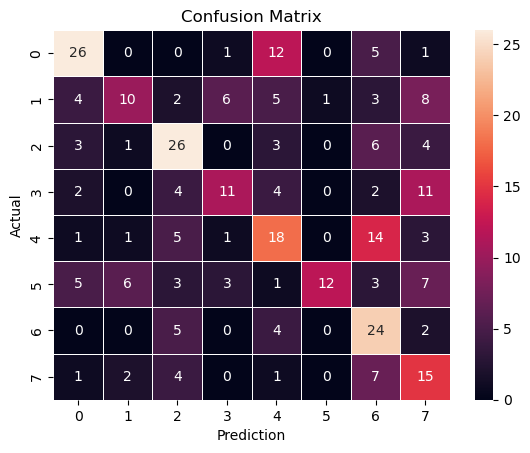

In [63]:
# Plot confusion matrix
plt.figure()
cm = confusion_matrix(y_val, predictions)
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [64]:
vectorizer = CountVectorizer(lowercase=True,
                             stop_words="english",
                             ngram_range=(1,3),
                             analyzer="char",
                             binary=True)

vectorizer.fit(x_train)
X_train_transformed = vectorizer.transform(x_train)
X_val_transformed = vectorizer.transform(x_val)

classifier = MultinomialNB()

#training model
classifier.fit(X_train_transformed, y_train)

#model predictions
predictions=classifier.predict(X_val_transformed)

report = classification_report(y_val, predictions, zero_division=0, output_dict=True)
#convert it into dataframe
df_report_train1 = pd.DataFrame(report).transpose()
print("Model Performance")
df_report_train1

Model Performance


,precision,recall,f1-score,support
0,0.625000,0.555556,0.588235,45.000000
1,0.550000,0.282051,0.372881,39.000000
2,0.461538,0.558140,0.505263,43.000000
3,0.478261,0.323529,0.385965,34.000000
4,0.375000,0.418605,0.395604,43.000000
5,0.857143,0.300000,0.444444,40.000000
6,0.380952,0.685714,0.489796,35.000000
7,0.326531,0.533333,0.405063,30.000000
accuracy,0.456311,0.456311,0.456311,0.456311
macro avg,0.506803,0.457116,0.448407,309.000000


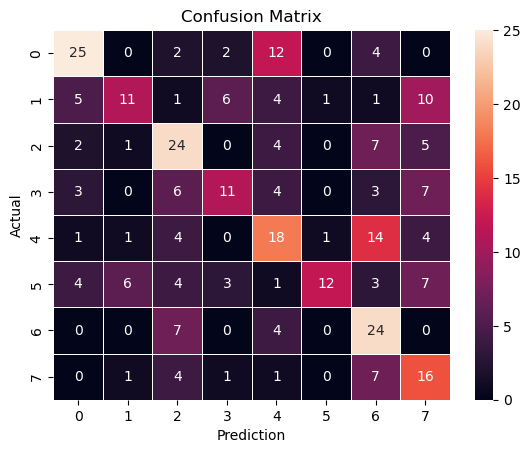

In [65]:
# Plot confusion matrix
plt.figure()
cm = confusion_matrix(y_val, predictions)
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

The first parameters gives slightly better result, but the second one can be tried after finding the best model parameters.

**Parameters:**

- **lowercase:** True

- **stop_words:** None   (english for the second one)

- **ngram_range:** (1,3)

- **analyzer:** char_wb

- **binary:** True

### Finding Best Model Parameters

**The hyper parameters which can be changed for Model:**

- **alpha:** float or array-like of shape (n_features,), default=1.0

- **force_alpha:** bool, default=True

In [180]:
alphas=[0, 0.0001,0.001, 0.01, 0.1, 0.1, 0.2, 0.25, 0.5, 0.6, 0.7, 0.75, 1, 1.25, 1.5, 1.75, 2]
force_alphas=[True, False]

In [181]:
best_accuracy=0
total_numbers=len(alphas)* len(force_alphas)
best_parameters=[]
with tqdm(total=total_numbers) as pbar:
    for force_alpha in force_alphas:
        for alpha in alphas:
            
            vectorizer = CountVectorizer()
            
            vectorizer.fit(x_train)
            X_train_transformed = vectorizer.transform(x_train)
            X_val_transformed = vectorizer.transform(x_val)
            
            classifier = MultinomialNB(alpha=alpha,
                                       force_alpha=force_alpha)
            
            classifier.fit(X_train_transformed, y_train)
            accuracy_validation = classifier.score(X_val_transformed, y_val)
            
            
            
            if accuracy_validation>best_accuracy:
                best_accuracy=accuracy_validation
            pbar.update(1)

print("Best validation accuracy: {:.2f}".format(best_accuracy))

                        

100%|██████████████████████████████████████████████████████████████████████████████████| 34/34 [00:01<00:00, 33.14it/s]

Best validation accuracy: 0.44


In [182]:
best_accuracy=best_accuracy
total_numbers=len(alphas)* len(force_alphas)
best_parameters=[]
with tqdm(total=total_numbers) as pbar:
    for force_alpha in force_alphas:
        for alpha in alphas:
                        
            vectorizer = CountVectorizer()
            
            vectorizer.fit(x_train)
            X_train_transformed = vectorizer.transform(x_train)
            X_val_transformed = vectorizer.transform(x_val)
            
            classifier = MultinomialNB(alpha=alpha,
                                       force_alpha=force_alpha)
            #training model
            classifier.fit(X_train_transformed, y_train)
            
            
            #model score
            accuracy_validation = classifier.score(X_val_transformed, y_val)
            
            
            if accuracy_validation>=best_accuracy:
                print("Accuracy: {:.2f}".format(accuracy_validation))
                
                
                
                best_model_parameters={"alpha":alpha,
                                            "force_alpha":force_alpha}
                
                best_parameters.append(best_model_parameters)
            
                print(best_model_parameters)
                
                
                best_accuracy=accuracy_validation
            pbar.update(1)         

 12%|█████████▊                                                                         | 4/34 [00:00<00:00, 34.17it/s]

Accuracy: 0.44
{'alpha': 0.01, 'force_alpha': True}


 82%|███████████████████████████████████████████████████████████████████▌              | 28/34 [00:00<00:00, 33.65it/s]

Accuracy: 0.44
{'alpha': 0.01, 'force_alpha': False}


100%|██████████████████████████████████████████████████████████████████████████████████| 34/34 [00:01<00:00, 33.73it/s]


In [183]:
df_best_par=pd.DataFrame(best_parameters)
df_best_par

,alpha,force_alpha
0,0.01,True
1,0.01,False


#### Finding best Combined Parameters

**For Vectorizer:**
- **lowercase:**  True

- **stop_words:** None (english for the second one)	

- **ngram_range:** (1,3)

- **analyzer:** char_wb

- **binary:** True


**For Model:**
- **alpha:** 0.01

- **force_alpha:** True or False (I chose True, default value)

In [184]:
lowercases=[True]
stop_words=[None, "english"]
ngram_ranges=[(1,i) for i in range(1,6)]
analyzers=['char','char_wb']
binaries=[True]

alphas=[i for i in np.linspace(0, 0.25, 11)]
force_alphas=[True]

In [185]:
best_accuracy=best_accuracy
total_numbers=len(lowercases)* len(stop_words)* len(ngram_ranges)* len(analyzers) * len(binaries) * len(alphas) * len(force_alphas)
best_parameters=[]
with tqdm(total=total_numbers) as pbar:
    for force_alpha in force_alphas:
        for alpha in alphas:
            for lowercase in lowercases:
                for stop_word in stop_words:
                    for ngram_range in ngram_ranges:
                        for analyzer in analyzers:
                            for binary in binaries:
                        
                                vectorizer = CountVectorizer(lowercase=lowercase,
                                                             stop_words=stop_word,
                                                             ngram_range=ngram_range,  
                                                             analyzer=analyzer, 
                                                             binary=binary)
                                
                                vectorizer.fit(x_train)
                                X_train_transformed = vectorizer.transform(x_train)
                                X_val_transformed = vectorizer.transform(x_val)
                                
                                classifier = MultinomialNB(alpha=alpha,
                                                           force_alpha=force_alpha)
                                #training model
                                classifier.fit(X_train_transformed, y_train)
                                
                                
                                #model score
                                accuracy_validation = classifier.score(X_val_transformed, y_val)
                                
                                
                                if accuracy_validation>=best_accuracy:
                                    print("Accuracy: {:.2f}".format(accuracy_validation))
                                    
                                    
                                    
                                    best_vm_parameters={"lowercase":lowercase,
                                                        "stop_words":stop_word,
                                                        "ngram_range":ngram_range,
                                                        "analyzer": analyzer,
                                                        "binary":binary,
                                                        "alpha":alpha,
                                                        "force_alpha":force_alpha,
                                                        "accuracy":accuracy_validation}
                                    best_parameters.append(best_vm_parameters)
                                
                                    print(best_vm_parameters)
                                    
                                    
                                    best_accuracy=accuracy_validation
                                pbar.update(1)         

 11%|█████████▏                                                                       | 25/220 [00:05<00:37,  5.14it/s]

Accuracy: 0.48
{'lowercase': True, 'stop_words': None, 'ngram_range': (1, 3), 'analyzer': 'char', 'binary': True, 'alpha': 0.025, 'force_alpha': True, 'accuracy': 0.48220064724919093}


 16%|████████████▉                                                                    | 35/220 [00:07<00:33,  5.50it/s]

Accuracy: 0.48
{'lowercase': True, 'stop_words': 'english', 'ngram_range': (1, 3), 'analyzer': 'char', 'binary': True, 'alpha': 0.025, 'force_alpha': True, 'accuracy': 0.48220064724919093}


 21%|█████████████████▎                                                               | 47/220 [00:10<00:38,  4.53it/s]

Accuracy: 0.48
{'lowercase': True, 'stop_words': None, 'ngram_range': (1, 4), 'analyzer': 'char', 'binary': True, 'alpha': 0.05, 'force_alpha': True, 'accuracy': 0.48220064724919093}



 22%|█████████████████▋                                                               | 48/220 [00:10<00:42,  4.03it/s]

Accuracy: 0.48
{'lowercase': True, 'stop_words': None, 'ngram_range': (1, 4), 'analyzer': 'char_wb', 'binary': True, 'alpha': 0.05, 'force_alpha': True, 'accuracy': 0.48220064724919093}


 26%|████████████████████▉                                                            | 57/220 [00:12<00:35,  4.59it/s]

Accuracy: 0.48
{'lowercase': True, 'stop_words': 'english', 'ngram_range': (1, 4), 'analyzer': 'char', 'binary': True, 'alpha': 0.05, 'force_alpha': True, 'accuracy': 0.48220064724919093}



 26%|█████████████████████▎                                                           | 58/220 [00:12<00:40,  4.05it/s]

Accuracy: 0.48
{'lowercase': True, 'stop_words': 'english', 'ngram_range': (1, 4), 'analyzer': 'char_wb', 'binary': True, 'alpha': 0.05, 'force_alpha': True, 'accuracy': 0.48220064724919093}


 30%|████████████████████████▋                                                        | 67/220 [00:14<00:33,  4.59it/s]

Accuracy: 0.48
{'lowercase': True, 'stop_words': None, 'ngram_range': (1, 4), 'analyzer': 'char', 'binary': True, 'alpha': 0.07500000000000001, 'force_alpha': True, 'accuracy': 0.48220064724919093}



 31%|█████████████████████████                                                        | 68/220 [00:15<00:36,  4.11it/s]

Accuracy: 0.49
{'lowercase': True, 'stop_words': None, 'ngram_range': (1, 4), 'analyzer': 'char_wb', 'binary': True, 'alpha': 0.07500000000000001, 'force_alpha': True, 'accuracy': 0.4886731391585761}


 35%|████████████████████████████▋                                                    | 78/220 [00:17<00:34,  4.11it/s]

Accuracy: 0.49
{'lowercase': True, 'stop_words': 'english', 'ngram_range': (1, 4), 'analyzer': 'char_wb', 'binary': True, 'alpha': 0.07500000000000001, 'force_alpha': True, 'accuracy': 0.4886731391585761}


 40%|████████████████████████████████                                                 | 87/220 [00:19<00:29,  4.58it/s]

Accuracy: 0.49
{'lowercase': True, 'stop_words': None, 'ngram_range': (1, 4), 'analyzer': 'char', 'binary': True, 'alpha': 0.1, 'force_alpha': True, 'accuracy': 0.4919093851132686}



 40%|████████████████████████████████▍                                                | 88/220 [00:19<00:33,  3.96it/s]

Accuracy: 0.50
{'lowercase': True, 'stop_words': None, 'ngram_range': (1, 4), 'analyzer': 'char_wb', 'binary': True, 'alpha': 0.1, 'force_alpha': True, 'accuracy': 0.49514563106796117}


 45%|████████████████████████████████████                                             | 98/220 [00:21<00:30,  4.00it/s]

Accuracy: 0.50
{'lowercase': True, 'stop_words': 'english', 'ngram_range': (1, 4), 'analyzer': 'char_wb', 'binary': True, 'alpha': 0.1, 'force_alpha': True, 'accuracy': 0.49514563106796117}


 49%|███████████████████████████████████████▎                                        | 108/220 [00:24<00:28,  3.94it/s]

Accuracy: 0.50
{'lowercase': True, 'stop_words': None, 'ngram_range': (1, 4), 'analyzer': 'char_wb', 'binary': True, 'alpha': 0.125, 'force_alpha': True, 'accuracy': 0.49838187702265374}


 54%|██████████████████████████████████████████▉                                     | 118/220 [00:26<00:29,  3.42it/s]

Accuracy: 0.50
{'lowercase': True, 'stop_words': 'english', 'ngram_range': (1, 4), 'analyzer': 'char_wb', 'binary': True, 'alpha': 0.125, 'force_alpha': True, 'accuracy': 0.49838187702265374}


 58%|██████████████████████████████████████████████▌                                 | 128/220 [00:28<00:23,  3.93it/s]

Accuracy: 0.50
{'lowercase': True, 'stop_words': None, 'ngram_range': (1, 4), 'analyzer': 'char_wb', 'binary': True, 'alpha': 0.15000000000000002, 'force_alpha': True, 'accuracy': 0.5048543689320388}


 63%|██████████████████████████████████████████████████▏                             | 138/220 [00:31<00:19,  4.14it/s]

Accuracy: 0.50
{'lowercase': True, 'stop_words': 'english', 'ngram_range': (1, 4), 'analyzer': 'char_wb', 'binary': True, 'alpha': 0.15000000000000002, 'force_alpha': True, 'accuracy': 0.5048543689320388}


 67%|█████████████████████████████████████████████████████▊                          | 148/220 [00:33<00:17,  4.04it/s]

Accuracy: 0.51
{'lowercase': True, 'stop_words': None, 'ngram_range': (1, 4), 'analyzer': 'char_wb', 'binary': True, 'alpha': 0.17500000000000002, 'force_alpha': True, 'accuracy': 0.5145631067961165}


 72%|█████████████████████████████████████████████████████████▍                      | 158/220 [00:35<00:15,  4.08it/s]

Accuracy: 0.51
{'lowercase': True, 'stop_words': 'english', 'ngram_range': (1, 4), 'analyzer': 'char_wb', 'binary': True, 'alpha': 0.17500000000000002, 'force_alpha': True, 'accuracy': 0.5145631067961165}


100%|████████████████████████████████████████████████████████████████████████████████| 220/220 [00:49<00:00,  4.45it/s]


In [186]:
df_best_par=pd.DataFrame(best_parameters)
df_best_par

,lowercase,stop_words,ngram_range,analyzer,binary,alpha,force_alpha,accuracy
0,True,None,"(1, 3)",char,True,0.025,True,0.482201
1,True,english,"(1, 3)",char,True,0.025,True,0.482201
2,True,None,"(1, 4)",char,True,0.050,True,0.482201
3,True,None,"(1, 4)",char_wb,True,0.050,True,0.482201
4,True,english,"(1, 4)",char,True,0.050,True,0.482201
5,True,english,"(1, 4)",char_wb,True,0.050,True,0.482201
6,True,None,"(1, 4)",char,True,0.075,True,0.482201
7,True,None,"(1, 4)",char_wb,True,0.075,True,0.488673
8,True,english,"(1, 4)",char_wb,True,0.075,True,0.488673
9,True,None,"(1, 4)",char,True,0.100,True,0.491909


I decided not to use "english" as stop_words to not to change the input much. Also, changing this parameter didn't change the accuracy.

#### Trying with other ngram_ranges and alpha values by changing analyzer

In [193]:
lowercases=[True]
stop_words=[None]
ngram_ranges=[(1,i) for i in range(1,11)]
analyzers=['char','char_wb']
binaries=[True]

alphas=[i for i in np.linspace(0.05, 0.5, 19)]
force_alphas=[True]

In [194]:
best_accuracy=best_accuracy
total_numbers=len(lowercases)* len(stop_words)* len(ngram_ranges)* len(analyzers) * len(binaries) * len(alphas) * len(force_alphas)
best_parameters=[]
with tqdm(total=total_numbers) as pbar:
    for force_alpha in force_alphas:
        for alpha in alphas:
            for lowercase in lowercases:
                for stop_word in stop_words:
                    for ngram_range in ngram_ranges:
                        for analyzer in analyzers:
                            for binary in binaries:
                        
                                vectorizer = CountVectorizer(lowercase=lowercase,
                                                             stop_words=stop_word,
                                                             ngram_range=ngram_range,  
                                                             analyzer=analyzer, 
                                                             binary=binary)
                                
                                vectorizer.fit(x_train)
                                X_train_transformed = vectorizer.transform(x_train)
                                X_val_transformed = vectorizer.transform(x_val)
                                
                                classifier = MultinomialNB(alpha=alpha,
                                                           force_alpha=force_alpha)
                                #training model
                                classifier.fit(X_train_transformed, y_train)
                                
                                
                                #model score
                                accuracy_validation = classifier.score(X_val_transformed, y_val)
                                
                                
                                if accuracy_validation>=best_accuracy:
                                    print("Accuracy: {:.2f}".format(accuracy_validation))
                                    
                                    
                                    
                                    best_vm_parameters={"lowercase":lowercase,
                                                        "stop_words":stop_word,
                                                        "ngram_range":ngram_range,
                                                        "analyzer": analyzer,
                                                        "binary":binary,
                                                        "alpha":alpha,
                                                        "force_alpha":force_alpha,
                                                        "accuracy":accuracy_validation}
                                    best_parameters.append(best_vm_parameters)
                                
                                    print(best_vm_parameters)
                                    
                                    
                                    best_accuracy=accuracy_validation
                                pbar.update(1)         

 28%|██████████████████████▋                                                         | 108/380 [00:54<01:17,  3.50it/s]

Accuracy: 0.51
{'lowercase': True, 'stop_words': None, 'ngram_range': (1, 4), 'analyzer': 'char_wb', 'binary': True, 'alpha': 0.175, 'force_alpha': True, 'accuracy': 0.5145631067961165}


100%|████████████████████████████████████████████████████████████████████████████████| 380/380 [03:16<00:00,  1.94it/s]


In [195]:
df_best_par=pd.DataFrame(best_parameters)
df_best_par

,lowercase,stop_words,ngram_range,analyzer,binary,alpha,force_alpha,accuracy
0,True,None,"(1, 4)",char_wb,True,0.175,True,0.514563


# Model Evaluation with the Chosen Parameters

**For Vectorizer:**
- **lowercase:**  True

- **stop_words:** None or english (None was preferred to not to change anything)	

- **ngram_range:** (1,4)

- **analyzer:** char vs. char_wb

- **binary:** True


**For Model:**
- **alpha:** 0.175
- **force_alpha:** True or False (I chose True, default value)

### Analyzer: char

In [198]:
vectorizer = CountVectorizer(lowercase=True,
                             stop_words=None,
                             ngram_range=(1,4),
                             analyzer="char",
                             binary=True)

vectorizer.fit(x_train)
X_train_transformed = vectorizer.transform(x_train)
X_val_transformed = vectorizer.transform(x_val)

classifier = MultinomialNB(alpha=0.175,
                           force_alpha=True)

#training model
classifier.fit(X_train_transformed, y_train)

#model predictions
predictions=classifier.predict(X_val_transformed)

report = classification_report(y_val, predictions, zero_division=0, output_dict=True)
#convert it into dataframe
df_report_train1 = pd.DataFrame(report).transpose()
print("Model Performance")
df_report_train1

Model Performance


,precision,recall,f1-score,support
0,0.684211,0.577778,0.626506,45.000000
1,0.406250,0.333333,0.366197,39.000000
2,0.476190,0.697674,0.566038,43.000000
3,0.454545,0.294118,0.357143,34.000000
4,0.534884,0.534884,0.534884,43.000000
5,0.629630,0.425000,0.507463,40.000000
6,0.387755,0.542857,0.452381,35.000000
7,0.371429,0.433333,0.400000,30.000000
accuracy,0.488673,0.488673,0.488673,0.488673
macro avg,0.493112,0.479872,0.476326,309.000000


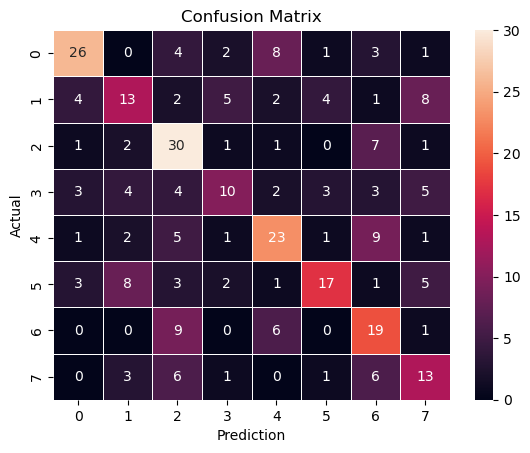

In [199]:
# Plot confusion matrix
plt.figure()
cm = confusion_matrix(y_val, predictions)
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

### Analyzer: char_wb

In [196]:
vectorizer = CountVectorizer(lowercase=True,
                             stop_words=None,
                             ngram_range=(1,4),
                             analyzer="char_wb",
                             binary=True)

vectorizer.fit(x_train)
X_train_transformed = vectorizer.transform(x_train)
X_val_transformed = vectorizer.transform(x_val)

classifier = MultinomialNB(alpha=0.175,
                           force_alpha=True)

#training model
classifier.fit(X_train_transformed, y_train)

#model predictions
predictions=classifier.predict(X_val_transformed)

report = classification_report(y_val, predictions, zero_division=0, output_dict=True)
#convert it into dataframe
df_report_train1 = pd.DataFrame(report).transpose()
print("Model Performance")
df_report_train1

Model Performance


,precision,recall,f1-score,support
0,0.658537,0.600000,0.627907,45.000000
1,0.516129,0.410256,0.457143,39.000000
2,0.491803,0.697674,0.576923,43.000000
3,0.625000,0.441176,0.517241,34.000000
4,0.500000,0.465116,0.481928,43.000000
5,0.772727,0.425000,0.548387,40.000000
6,0.372549,0.542857,0.441860,35.000000
7,0.384615,0.500000,0.434783,30.000000
accuracy,0.514563,0.514563,0.514563,0.514563
macro avg,0.540170,0.510260,0.510772,309.000000


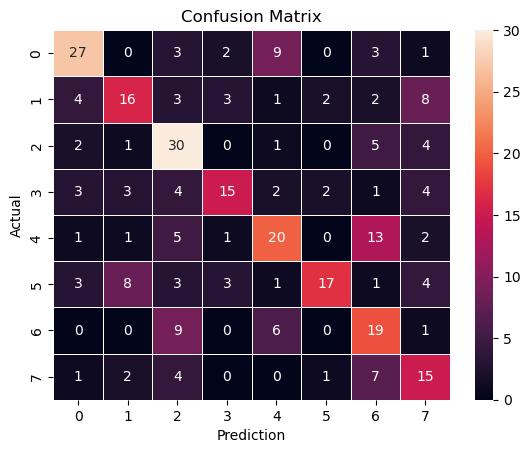

In [197]:
# Plot confusion matrix
plt.figure()
cm = confusion_matrix(y_val, predictions)
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()